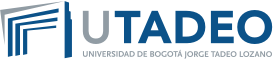

# INTELIGENCIA ARTIFICIAL 1S-2023

# Proyecto Final: Detección de Objetos Con DETR y YOLOS

# Grupo I.A: Edison Cabrera, Alexis Riaño, Cristian Paez

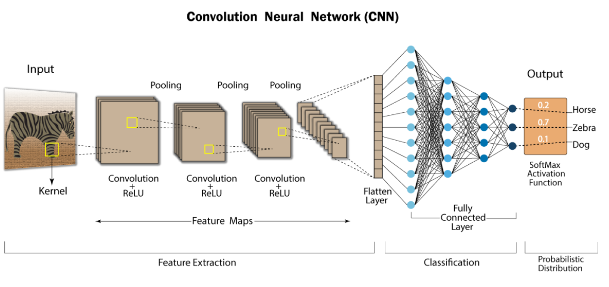

**Deep Residual Learning for Image Recognition (ResNet50)**

Las redes neuronales más profundas son más difíciles de entrenar. Presentamos un marco de aprendizaje residual para facilitar el entrenamiento de redes que son sustancialmente más profundas que las utilizadas anteriormente. Reformulamos explícitamente las capas como funciones residuales de aprendizaje con referencia a las entradas de la capa, en lugar de aprender funciones no referenciadas. Brindamos evidencia empírica integral que muestra que estas redes residuales son más fáciles de optimizar y pueden ganar precisión a partir de una profundidad considerablemente mayor.

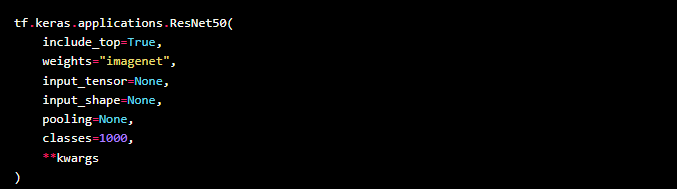

**Reference**

*   [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) (CVPR 2015)

**The CIFAR-10 dataset**

El conjunto de datos CIFAR-10 consta de 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.

El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10000 imágenes. El lote de prueba contiene exactamente 1000 imágenes seleccionadas al azar de cada clase. Los lotes de entrenamiento contienen las imágenes restantes en orden aleatorio, pero algunos lotes de entrenamiento pueden contener más imágenes de una clase que de otra. Entre ellos, los lotes de entrenamiento contienen exactamente 5000 imágenes de cada clase.

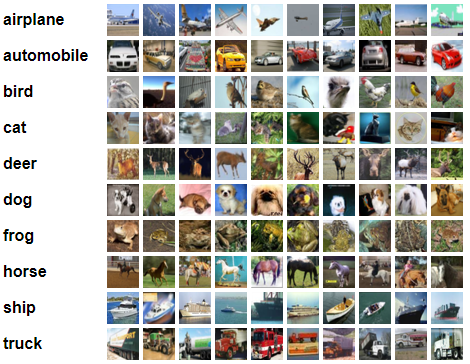

**Reference**

*   [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)



**Instalación requerimientos previos**

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-0132nsy_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-0132nsy_
  Resolved https://github.com/huggingface/transformers.git to commit 9a50cb6195cb477c1feae8f0fb2bce20b679246f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached requests_file-1.5.1-py2.py3-none-any.whl (3.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.0 M

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 k

**Modelo Detector de Objetos**

In [ ]:
import io
import gradio as gr
import matplotlib.pyplot as plt
import requests, validators
import torch
import pathlib
from PIL import Image
from transformers import AutoFeatureExtractor, DetrForObjectDetection, YolosForObjectDetection

import os

In [ ]:
# colors for visualization
COLORS = [
    [0.000, 0.447, 0.741],
    [0.850, 0.325, 0.098],
    [0.929, 0.694, 0.125],
    [0.494, 0.184, 0.556],
    [0.466, 0.674, 0.188],
    [0.301, 0.745, 0.933]
]

In [ ]:
def make_prediction(img, feature_extractor, model):
    inputs = feature_extractor(img, return_tensors="pt")
    outputs = model(**inputs)
    img_size = torch.tensor([tuple(reversed(img.size))])
    processed_outputs = feature_extractor.post_process(outputs, img_size)
    return processed_outputs[0]

def fig2img(fig):
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

In [ ]:
def visualize_prediction(pil_img, output_dict, threshold=0.7, id2label=None):
    keep = output_dict["scores"] > threshold
    boxes = output_dict["boxes"][keep].tolist()
    scores = output_dict["scores"][keep].tolist()
    labels = output_dict["labels"][keep].tolist()
    if id2label is not None:
        labels = [id2label[x] for x in labels]

    plt.figure(figsize=(16, 10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, (xmin, ymin, xmax, ymax), label, color in zip(scores, boxes, labels, colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=color, linewidth=3))
        ax.text(xmin, ymin, f"{label}: {score:0.2f}", fontsize=15, bbox=dict(facecolor="yellow", alpha=0.5))
    plt.axis("off")
    return fig2img(plt.gcf())

In [ ]:
def detect_objects(model_name,url_input,image_input,threshold):
    
    #Extract model and feature extractor
    feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
    
    if 'detr' in model_name:
        
        model = DetrForObjectDetection.from_pretrained(model_name)
        
    elif 'yolos' in model_name:
    
        model = YolosForObjectDetection.from_pretrained(model_name)
    
    if validators.url(url_input):
        image = Image.open(requests.get(url_input, stream=True).raw)
        
    elif image_input:
        image = image_input
    
    #Make prediction
    processed_outputs = make_prediction(image, feature_extractor, model)
    
    #Visualize prediction
    viz_img = visualize_prediction(image, processed_outputs, threshold, model.config.id2label)
    
    return viz_img  

In [ ]:
def set_example_image(example: list) -> dict:
    return gr.Image.update(value=example[0])

def set_example_url(example: list) -> dict:
    return gr.Textbox.update(value=example[0])

In [ ]:
title = """<h1 id="title">Object Detection App with DETR and YOLOS</h1>"""


models = ["facebook/detr-resnet-50","facebook/detr-resnet-101",'hustvl/yolos-small','hustvl/yolos-tiny']
urls = ["https://c8.alamy.com/comp/J2AB4K/the-new-york-stock-exchange-on-the-wall-street-in-new-york-J2AB4K.jpg"]


css = '''
h1#title {
  text-align: center;
}
'''
demo = gr.Blocks(css=css)

In [ ]:
with demo:
    gr.Markdown(title)    
    options = gr.Dropdown(choices=models,label='Select Object Detection Model',show_label=True)
    slider_input = gr.Slider(minimum=0.2,maximum=1,value=0.7,label='Prediction Threshold')
    
    with gr.Tabs():
        with gr.TabItem('Image URL'):
            with gr.Row():
                url_input = gr.Textbox(lines=2,label='Enter valid image URL here..')
                img_output_from_url = gr.Image(shape=(650,650))
                
            with gr.Row():
                example_url = gr.Dataset(components=[url_input],samples=[[str(url)] for url in urls])
            
            url_but = gr.Button('Detect')
     
        with gr.TabItem('Image Upload'):
            with gr.Row():
                img_input = gr.Image(type='pil')
                img_output_from_upload= gr.Image(shape=(650,650))
                
            with gr.Row(): 
                example_images = gr.Dataset(components=[img_input],
                                            samples=[[path.as_posix()]
                                                     for path in sorted(pathlib.Path('images').rglob('*.JPG'))])
                
            img_but = gr.Button('Detect')
        
    
    url_but.click(detect_objects,inputs=[options,url_input,img_input,slider_input],outputs=img_output_from_url,queue=True)
    img_but.click(detect_objects,inputs=[options,url_input,img_input,slider_input],outputs=img_output_from_upload,queue=True)
    example_images.click(fn=set_example_image,inputs=[example_images],outputs=[img_input])
    example_url.click(fn=set_example_url,inputs=[example_url],outputs=[url_input])
    

demo.launch(enable_queue=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6ea77d4b638f1f698d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


**Funcionamiento del modelo con Gradio y Hugging Face**

**Tutorial**

*   [Creación y hosting de demos de machine learning con Gradio y Hugging Face](https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/tutorials/ES/02_ml-demos-con-gradio.ipynb)

In [ ]:
#hide_input
from IPython.display import display, HTML, IFrame
display(IFrame('https://hf.space/embed/eddie5389/Object-Detection-With-DETR-and-YOLOS/+', width=900, height=900))